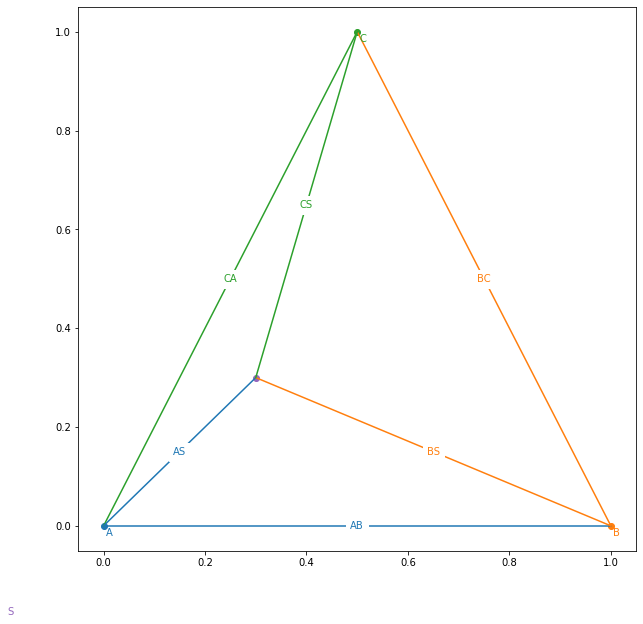

In [6]:
from labellines import labelLine, labelLines
from matplotlib import pyplot as plt
from numpy import array as arr
import numpy as np

A = [0,0]
B = [1,0]
C = [0.5, 1]
Colors = ['tab:blue', 'tab:orange', 'tab:green']
L = ['AB', 'BC', 'CA']
P = np.array(A + B + C + A).reshape((4,2))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for i in range(0, 3):
  ax.plot(P[i:(i+2),0], P[i:(i+2),1], label=L[i], color=Colors[i])
  lines = plt.gca().get_lines()
  labelLine(lines[-1], label=L[i], x=np.mean(P[i:(i+2),0]), align=False)
  
for i in range(0, 3):
  ax.scatter(P[i,0], P[i,1])
  ax.annotate('ABC'[i], xy=P[i,:], xytext=P[i,:]-[-0.005,0.02], color=Colors[i])
  
S = np.array([0.3, 0.3])
ax.scatter(S[0], S[1], label='S', color='tab:purple')
ax.annotate('S', xy=S, xytext=S-[0.49, 0.48], color='tab:purple')

for i in range(0, 3):
  labels = ['AS', 'BS', 'CS']
  ax.plot([P[i,0], S[0]], [P[i,1], S[1]], label=labels[i], color=Colors[i])
  lines = plt.gca().get_lines()
  labelLine(lines[-1], label=labels[i], x=np.mean([P[i,0], S[0]]), align=False)
    
plt.show()

In [2]:
from numpy import pi, cos, sin, arccos, arange, dot, cross
from numpy.linalg import norm
import numpy as np

# Create 3 vectors to define the triangle
A = np.array([0, 0, 0.25])
B = np.array([1, 0, 0.25])
C = np.array([0.5, 1, 0.25])

# S = the point of the ray
# D = the direction of the ray
S = [0.5, 0.5, 5]
D = np.array([0, 0, -1])

# N = The normal vector of the triangle
N = cross(A-B, B-C)
N /= norm(N)
# Force the normal to oppose the ray
if (dot(A-S, S) > 0): N = -N

# t defines the length of ray needed to intersect the plane
t = dot(N, A-S)/dot(N, D)

# dot(N, D) could be zero, member to do a <=zero check
if (abs(dot(N,D)) > 0.001):
  PlanePoint = S + D*t

  AB = B - A
  BC = C - B
  CA = A - C

  dA = PlanePoint - A
  dB = PlanePoint - B
  dC = PlanePoint - C

  aV = cross(AB, dA)
  bV = cross(BC, dB)
  cV = cross(CA, dC)

  # Are they aligned?
  aAlign = dot(aV, N) > 0
  bAlign = dot(bV, N) > 0
  cAlign = dot(cV, N) > 0

  print("A: %s, B: %s, C: %s" % (aAlign, bAlign, cAlign))
else:
  print("Not aligned")

A: True, B: True, C: True


In [3]:
import ipyvolume as ipv
from numpy import pi, cos, sin, arccos, arange, dot, cross
from numpy.linalg import norm

# A,B,C are triangle points
# S is the ray origin
# D is the ray direction
def intersects(A, B, C, S, D, color='red'):
  # N = The normal vector of the triangle
  N = cross(A-B, B-C)
  N /= norm(N)
  # Force the normal to oppose the ray
  if (dot(N, D) > 0): N = -N

  # t defines the length of ray needed to intersect the plane
  t = dot(N, A-S)/dot(N, D)

  # dot(N, D) could be zero, member to do a <=zero check
  # dot(N, D) == 0 means that the ray and plane are parallel
  if (abs(dot(N,D)) > 0.001 and t > 0):
    PlanePoint = S + D*t

    PN = [
      cross(B - A, PlanePoint - A),
      cross(C - B, PlanePoint - B),
      cross(A - C, PlanePoint - C)
    ]
    
    PN = [pn/norm(pn) for pn in PN]
    
    [ipv.plot(*zip(l[0], l[0]+l[1]), color=color) for l in zip([A,B,C], PN)]
    
    intersect = all([dot(pn, N) > 0 for pn in PN])
    if (intersect): ipv.scatter(*PlanePoint.reshape(3,1), color='green')

    if (intersect): return PlanePoint
  return None

In [8]:
import numpy as np
import ipyvolume as ipv

A1 = np.array([25.00, 6.59, -1.00])
B1 = np.array([24.00, 6.47, -1.00])
C1 = np.array([25.00, 6.60, 0.00])

A2 = np.array([25.00, 6.60, 0.00])
B2 = np.array([24.00, 6.47, -1.00])
C2 = np.array([24.00, 6.32, 0.00])

S = np.array([24.50, 7.79, -0.45])
D = np.array([0, -1, 0.1])

fig = ipv.figure(width=950, height=600)
# ipv.plot_trisurf(*zip(A1, B1, C1), triangles=[(0,1,2)], color='blue')
ipv.plot_trisurf(*zip(A2, B2, C2), triangles=[(0,1,2)], color='red')
ipv.scatter(*S.reshape(3,1), color='orange')

R = S + D * 4
ipv.plot(*zip(S, R), color='cyan')

ABC = arr([A2, B2, C2])
N = cross(A2-B2, B2-C2)
N /= norm(N)
# Force the normal to oppose the ray
if (dot(N, D) > 0): N = -N
ipv.quiver(*np.average(ABC, axis=0).reshape(3,1), *N, color='blue', marker='arrow')

# print("Intersects 1: %s" % intersects(A1, B1, C1, S, D, 'blue'))
print("Intersects 2: %s" % intersects(A2, B2, C2, S, D, 'red'))

ipv.xlim(23, 26)
ipv.ylim(5,8)
ipv.zlim(-2, 1)
ipv.pylab.style.box_off()
ipv.pylab.style.set_style_dark()

ipv.show()

Intersects 2: [24.5         6.50827411 -0.32182741]


In [9]:
import ipyvolume.embed
ipyvolume.embed.embed_html("ray-triangle.html", fig, offline=True)

In [5]:
# Boid at P=arr([49.66, 3.45, 18.56]); V=arr([0.09, -0.30, -0.39])  intersects in 1000.00 t=-1163005939 ---  [50.00, 3.12, 18.00],[49.47, 3.00, 19.00],[50.00, 3.50, 19.00],[49.76, 3.00, 18.00],[49.47, 3.00, 19.00],[50.00, 3.12, 18.00],[49.00, 3.00, 17.55],[49.00, 2.59, 18.00],[49.76, 3.00, 18.00], | Open velocity: [0.00, 0.00, 0.00] 

P=arr([49.66, 3.45, 18.56])
V=arr([0.09, -0.30, -0.39])

ALL=[
     [50.00, 3.12, 18.00],[49.47, 3.00, 19.00],[50.00, 3.50, 19.00],[49.76, 3.00, 18.00],[49.47, 3.00, 19.00],[50.00, 3.12, 18.00],[49.00, 3.00, 17.55],[49.00, 2.59, 18.00],[49.76, 3.00, 18.00]
]

fig = ipv.figure(width=950, height=600)
ipv.plot(*zip(P, R), color='cyan')

for i in range(0, len(ALL), 3):
    A = arr(ALL[i])
    B = arr(ALL[i+1])
    C = arr(ALL[i+2])

    ABC = arr([A,B,C])

    ipv.scatter(*P.reshape(3,1), color='orange')

    N = cross(A-B, B-C)
    N /= norm(N)

    if (dot(N, D) > 0): N = -N
    ipv.quiver(*np.average(ABC, axis=0).reshape(3,1), *N, color='blue', marker='arrow')

    R = P + V * 4
    intersect = intersects(A, B, C, P, V, 'red')
    ipv.plot_trisurf(*zip(A, B, C), triangles=[(0,1,2)], color=('orange' if (intersect is not None) else 'red'))
    print("Intersects %d: %s, d=%.2f" % (i, intersect, norm(intersect-P) if (intersect is not None) else -1))

ipv.xlim(min(ABC[:,0])-1, max(ABC[:,0])+1)
ipv.ylim(min(ABC[:,1])-1, max(ABC[:,1])+1)
ipv.zlim(min(ABC[:,2])-1, max(ABC[:,2])+1)
ipv.pylab.style.box_off()
ipv.pylab.style.set_style_dark()
ipv.show()

Intersects 0: None, d=-1.00
Intersects 3: None, d=-1.00
Intersects 6: None, d=-1.00
